<a href="https://colab.research.google.com/github/IM07813/tfbasics/blob/main/classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## classification problem
1. **Input layer shape** (same as no. of features) 
2. **hidden layers** (min = 1, max = unlimited)
3. **neurons per hiddenlayer** (10-100 in general)
4. **Output layer shape** (depends on classes)
    1. binary classification
    2. multi-class classification
    3. multi-label classification
5. **Hidden activation function** (Relu etc)
6. **Output activation** (sigmoid usually) 
7. **Loss function** (cross-entropy etc)
8. **Optimizer**  (SGD etc)

Most common input layer has 4 parameter or is 4 dimentional 
1. **Example** [batch_size, width, height, color_channels]

In [1]:
from sklearn.datasets import make_circles

n_samples = 1000 

X, Y = make_circles(n_samples, noise=0.03, random_state=42)


In [2]:
X #checking features

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
Y #checking labels

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [4]:
#visualizing our data
import pandas as pd 
circles = pd.DataFrame({"X0" :X[:,0], "X1" :X[:,1], "label":Y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


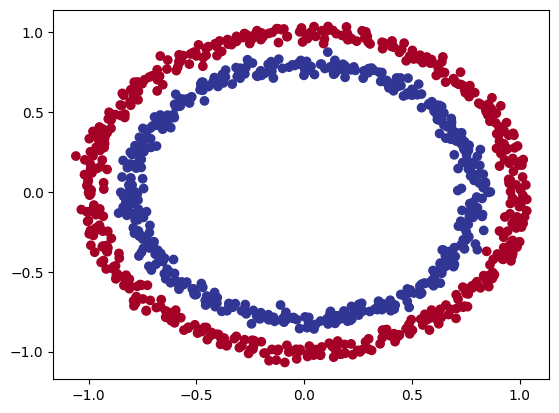

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=Y, cmap = plt.cm.RdYlBu)

###We will create a model to classify inputs to where they belong, either red or blue.
1. It's a binary classification problem 


In [6]:
X.shape, Y.shape

((1000, 2), (1000,))

In [7]:
len(X), len(Y)

(1000, 1000)

In [8]:
import tensorflow as tf

In [9]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['accuracy'])

model_1.fit(X, Y, epochs = 5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 5.8630 - accuracy: 0.4810
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 5.6185 - accuracy: 0.4920
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 4.6947 - accuracy: 0.4950
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.9631 - accuracy: 0.5040
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7171 - accuracy: 0.5000


In [10]:
model_1.evaluate(X, Y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7065 - accuracy: 0.4990


[0.7065474987030029, 0.49900001287460327]

In [11]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['accuracy'])

model_2.fit(X, Y, epochs = 20, verbose = 2)

Epoch 1/20
32/32 - 1s - loss: 4.4625 - accuracy: 0.4970 - 591ms/epoch - 18ms/step
Epoch 2/20
32/32 - 0s - loss: 1.5921 - accuracy: 0.5090 - 48ms/epoch - 1ms/step
Epoch 3/20
32/32 - 0s - loss: 0.7595 - accuracy: 0.4950 - 47ms/epoch - 1ms/step
Epoch 4/20
32/32 - 0s - loss: 0.7278 - accuracy: 0.4940 - 51ms/epoch - 2ms/step
Epoch 5/20
32/32 - 0s - loss: 0.7144 - accuracy: 0.4920 - 58ms/epoch - 2ms/step
Epoch 6/20
32/32 - 0s - loss: 0.7075 - accuracy: 0.4950 - 49ms/epoch - 2ms/step
Epoch 7/20
32/32 - 0s - loss: 0.7041 - accuracy: 0.5010 - 54ms/epoch - 2ms/step
Epoch 8/20
32/32 - 0s - loss: 0.7009 - accuracy: 0.4970 - 71ms/epoch - 2ms/step
Epoch 9/20
32/32 - 0s - loss: 0.6989 - accuracy: 0.4950 - 46ms/epoch - 1ms/step
Epoch 10/20
32/32 - 0s - loss: 0.6973 - accuracy: 0.4900 - 53ms/epoch - 2ms/step
Epoch 11/20
32/32 - 0s - loss: 0.6968 - accuracy: 0.4950 - 53ms/epoch - 2ms/step
Epoch 12/20
32/32 - 0s - loss: 0.6964 - accuracy: 0.4990 - 55ms/epoch - 2ms/step
Epoch 13/20
32/32 - 0s - loss: 0.69

In [12]:
model_2.evaluate(X,Y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.4660


[0.6935911774635315, 0.4659999907016754]

In [24]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

model_3.fit(X, Y, epochs = 20)

Epoch 1/20
32/32 [==============================] - 2s 3ms/step - loss: 2.4914 - accuracy: 0.4580
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 0.7064 - accuracy: 0.4970
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.4980
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6990 - accuracy: 0.5110
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6982 - accuracy: 0.4850
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 0.7003 - accuracy: 0.4680
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.5090
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.5180
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 0.7009 - accuracy: 0.4990
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.4840
Epoch 11/20
32/32 [

In [25]:
model_3.evaluate(X,Y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7047 - accuracy: 0.5000


[0.7046933770179749, 0.5]

#let's visualize decision boundary 
1. take in a trained model.
2. create a meshgrid of the different X values 
3. Make predictions across the meshgrid 
4. Plot the predictions as well as a line between zones 


In [26]:
import numpy as np

def plot_decision_boundary(model, X, Y):
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  x_in = np.c_[xx.ravel(),yy.ravel()]

  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    y_pred = np.argmax(y_pred, axis =1). reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx,yy, y_pred, cmap = plt.cm.RdYlBu,  alpha = 0.7)
  plt.scatter(X[:,0], X[:,1], c=Y, s=40,cmap = plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  

313/313 [==============================] - 0s 1ms/step
doing binary classification


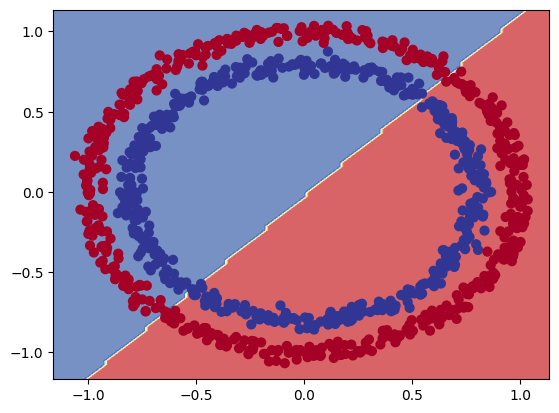

In [27]:
plot_decision_boundary(model = model_3,
                       X = X,
                       Y = Y)

## as we can see the model here is doing poorly and trying to make a best fit line to predict where each new particle will go and it's not working